###### Please note: There are two files for General Equilibrium with Aggregate Risk. They both assume different parameter values. 

## General Equilibrium with Aggregate Risk 

The recursive HH problem is the following:

(1) $V(a,e,\Psi,z) = \underset{\{c, a',n\}}{\max{}} log(c) - \Gamma \frac{n^{1+\gamma}}{1+\gamma} + \beta \mathop{\mathbb{E}} V(a',e',\Psi',z')$

s.t.

(2)  $c + a' = w(\Psi,z)ne + (1+r(\Psi,z))a$

<br/>

The technology is given by a **Cobb-Douglas** aggregate production function:

(3) $y = z_s K ^{\alpha} N^{(1-\alpha)}$

<br/>

Then, from (3) we can recover factor prices: 

(3.1) $w(K,z_s)= (1-\alpha)z_s \big(\frac{K}{N}\big)^\alpha$

(3.2) $r(K,z_s) = \alpha z_s \big(\frac{N}{K}\big)^{1-\alpha}$

<br/>

**Description of the state vector**

a: idiosyncratic level of wealth.

e: employment situation = {high, low}

z: aggregate productivity. 

$\Psi(a,e)$: distribution of wealth and employment.

<br/>

Notice that the aggregate capital is determined by the distribution of wealth and employment $K = f(\Psi(a,e))$. Then, prices (w,r) are a function of the distribution. That is why the whole distribution, and not only the aggregate capital, is one of the aggregate state variables. 

<br/>

**Expectation computation**

(4) $\mathop{\mathbb{E}} V(a',e',\Psi',z') =\pi_{0l|ez}V(a',0,\Psi',l) + \pi_{0h|ez}V(a',0,\Psi',h)+ \pi_{1l|ez}V(a',1,\Psi',l) + \pi_{1h|ez}V(a',0,\Psi',h)$

<br/>

**Aggregate Law of Motion**

(5) $\Psi(\bar{a},\bar{e})=\underset{e'} \sum \pi_{\bar{e'}|e} \underset{\bar{a}=a'(e,a)} \sum \Psi(a,e)$

<br/>

### Krusell & Smith simplification
A way of simplifying the problem is to replace the whole distribution by just the aggregate capital, which is the first moment of the assets distribution. This is the trick K&S (1998) raised. Doing so, we end up with the following program:

(6) $V(a,e,K,z) = \underset{\{a',n\}}{\max{}} log(w(K,z)ne + (1+r(K,z))a -a') - \Gamma \frac{n^{1+\gamma}}{1+\gamma} + \beta \mathop{\mathbb{E}} V(a',e',K',z')$


Where 

(7) $K'=H(K,z)= exp(\beta_{0h} + \beta_{1h}*log(K))P + exp(\beta_{0l} + \beta_{1l}*log(K))(1-P)$


where:
- $P=1$ if $z_t=z_h$, 0 otherwise. 
- $\beta_{0h}$=0.1839
- $\beta_{0l}$=0.3217
- $\beta_{1h}$=0.9375
- $\beta_{1l}$=0.8855

(remember that the values of $\beta$ come from PS6). 

Finally, remember that $(w/r)=f(K/N,z)$. As a consequence, we need a mapping from (K,z) to N. This function is given by G:

(8) $ N(K,z) = (1-P)N_{z_l} + PN_{z_h}$


where $N_{z_s}$ is the aggregate shock-dependent employment.

<br/>

**Consistency conditions**

(9) $K'= H(K,z)= \underset {a,e}\sum a'(a,e)$

(10) $N'=G(K,z)=\underset {a,e}\sum n(a,e)$

<br/>

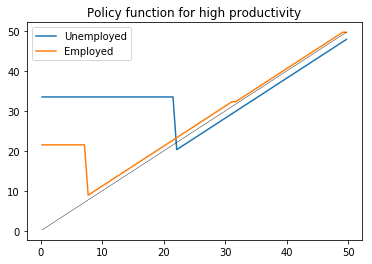

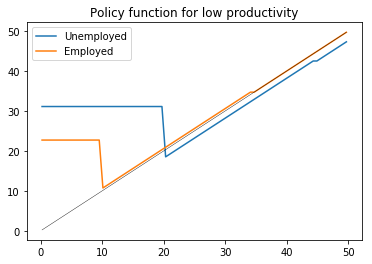

In [7]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.solvers.solveset import linsolve
import itertools as it
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from scipy.optimize import *
from numpy import *

#STEP 1: Set the parameter values, state space and the transition matrix.
#PARAMETERS
β=0.95
δ=0.025
γ=8
α=0.36
L = [0.91, 0.93]
z=[0.95, 1.05]
e=[0,1]
Γ=1

#State space
k0=np.arange(0,5,0.2)
k1=np.arange(5.3,50,0.6)
k=np.concatenate((k0,k1))
K=np.arange(16,18.5,0.5)

#TRANSITION MATRIX
π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44 = symbols ('π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44')
Π_1=linsolve([π_11 + π_12 + π_13 + π_14 -1, 
          π_21 + π_22 + π_23 + π_24 -1, 
          π_31 + π_32 + π_33 + π_34 -1, 
          π_41 + π_42 + π_43 + π_44 -1,
          π_21 + π_22 - 7/8,
          π_23 + π_24 - 1/8,
          π_43 + π_44 - 7/8,
          π_41 + π_42 - 1/8,
          π_33 + π_34 - 7/8,
          π_11 + π_12 - 7/8,
          π_31 + π_32 - 1/8,  
          π_13 + π_14 - 1/8,
          (0.04/(1/8))*π_31 + (0.96/(1/8))*π_41 - 0.1, 
          (0.04/(7/8))*π_33 + (0.96/(7/8))*π_43 - 0.04,
          (0.1/(7/8))*π_11 + (0.9/(7/8))*π_21 - 0.1,
          (0.1/(1/8))*π_13 + (0.9/(1/8))*π_23 - 0.1,
          π_31 - (1.25/7)*π_11,
          π_13 - (0.75/7)*π_33,
          π_43-0.005,
          π_21-0.02],
          (π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44))


Π_1= np.asarray(list(Π_1))
Π_1= np.reshape(Π_1, (4,4))


# STEP 2: PERCEIVED LAW OF MOTION
#Law of Motion functions
def H(Z,i):
    """It takes a specific value of aggregate capital 
    and productivity shock and returns the log of the 
    next period aggregate capital."""
    b0g=0.1839
    b1g=0.9375
    b0b=0.3217
    b1b=0.8855
    return np.exp((b0g+b1g*np.log(Z))*i + ((b0b+b1b*np.log(Z))*(1-i)))
       
#Feasible consumption for all possible combinations of states. 
#Checking how itertools works.
#list(it.product(range(2), range(2),range(5)))

C=np.empty((100,100,5,2,2))    
for i,j,I,m,p in it.product(range(100), range(100),range(5), range(2), range(2)):
    def Implicit(x):
        c=x[0]
        F=empty((1))
        F[0] = pow(((1-α)*z[p]*pow((K[I]/L[m]),α))*e[m], (1+γ/γ))*pow(Γ*c, -1/γ) + (1+(α*z[p]*pow((L[m]/K[I]),(1-α))))*k[i] - k[j] -c
        return F

    C[i,j,I,m,p]=fsolve(Implicit,1)
    
#Compute wages and rent
w = np.empty((2,5))
r= np.empty((2,5))
for m,I in it.product(range(2), range(5)): 
    w[m,I] = (1-α)*z[m]*pow((K[I]/L[m]),α)
    r[m,I]= α*z[m]*pow((L[m]/K[I]),(1-α))

#Utility for consumption 
logC= np.log(C)

#Checing if there are undefined values for utility in consumption
np.isnan(logC)
logC[np.isnan(logC)]=0

#Compute Disutility from Labour
U_L = np.empty((100,100,5,2,2)) 
#Computing disutility from labour
for I,m in it.product(range(5),range(2)):
    U_L[:,:,I,m,:] = (Γ/(1+γ))*pow((w[m,I]/Γ*C[:,:,I,m,:]), (1+γ)/γ)
U_L

#Total Utility 
U= logC - U_L

#Value Function Iteration
V0g=np.zeros((100,5))
V1g=np.zeros((100,5))
V0b=np.zeros((100,5))
V1b=np.zeros((100,5))

V0gt=np.zeros((100,5))
V1gt=np.zeros((100,5))
V0bt=np.zeros((100,5))
V1bt=np.zeros((100,5))
count = 0
eps=0.00001
Dev=1
while Dev > eps: 
    for i,I in it.product(range(100), range(5)):
        j=np.argmin(abs(K - H(K[I],0)))
        V0bt[i,j]=max(U[i, :, j, 0, 0] + β*(((Π_1[0,0]*V0b[:,j]))+
                               (Π_1[0,1]*V1b[:,j])+(Π_1[0,2]*V0g[:,j])+(Π_1[0,3]*V1g[:,j])))

        V1bt[i,j]=max(U[i,:,j,1,0] + β*(((Π_1[1,0]*V0b[:,j]))+
                               (Π_1[1,1]*V1b[:,j])+(Π_1[1,2]*V0g[:,j])+(Π_1[1,3]*V1g[:,j])))

        f=np.argmin(abs(K - H(K[I],1)))
        V0gt[i,j]= max(U[i,:,f,0,1] + β*(((Π_1[2,0]*V0b[:,f]))+ (Π_1[2,1]*V1b[:,f])+(Π_1[2,2]*V0g[:,f])+(Π_1[2,3]*V1g[:,f])))
        V1gt[i,j] = max(U[i,:,f,1,1] + β*(((Π_1[3,0]*V0b[:,f]))+(Π_1[3,1]*V1b[:,f])+(Π_1[3,2]*V0g[:,f])+(Π_1[3,3]*V1g[:,f])))
        
        V0g=V0gt
        V1g=V1gt
        V0b=V0bt
        V1b=V1bt

        Diff0=abs(V0gt-V0g)
        dev0=Diff0.max()

        Diff1=abs(V1gt-V1g)
        dev1=Diff1.max()

        Diff2=abs(V0bt-V0b)
        dev2=Diff2.max()

        Diff3=abs(V1bt-V1b)
        dev3=Diff3.max()

        Dev=max(dev0, dev1, dev2, dev3)
        count+=1
        
#Retrieving Policy Functions
G0b=np.zeros((100,5))
G1b=np.zeros((100,5))
G0g=np.zeros((100,5))
G1g=np.zeros((100,5))
for i,I in it.product(range(100), range(5)):
    j=np.argmin(abs(K - H(K[I],0)))
    G0b[i,j]= np.argmax(U[i, :, j, 0, 0] + β*(((Π_1[0,0]*V0b[:,j]))+ (Π_1[0,1]*V1b[:,j])+(Π_1[0,2]*V0g[:,j])+(Π_1[0,3]*V1g[:,j])))
    G1b[i,j] = np.argmax(U[i,:,j,1,0] + β*(((Π_1[1,0]*V0b[:,j]))+(Π_1[1,1]*V1b[:,j])+(Π_1[1,2]*V0g[:,j])+(Π_1[1,3]*V1g[:,j])))

    f=np.argmin(abs(K - H(K[I],1)))
    G0g[i,j]=np.argmax(U[i,:,f,0,1] + β*(((Π_1[2,0]*V0b[:,f]))+
                           (Π_1[2,1]*V1b[:,f])+(Π_1[2,2]*V0g[:,f])+(Π_1[2,3]*V1g[:,f])))

    G1g[i,j]=np.argmax(U[i,:,f,1,1] + β*(((Π_1[3,0]*V0b[:,f]))+
                           (Π_1[3,1]*V1b[:,f])+(Π_1[3,2]*V0g[:,f])+(Π_1[3,3]*V1g[:,f])))
    
#Now, recover the values
g0g=np.zeros((100,5))
g1g=np.zeros((100,5))
g0b=np.zeros((100,5))
g1b=np.zeros((100,5))
for i,I in it.product(range(100), range(5)):
    g0g[i,I]=k[int(G0g[i,I])]
    g1g[i,I]=k[int(G1g[i,I])]
    g1b[i,I]=k[int(G1b[i,I])]
    g0b[i,I]=k[int(G0b[i,I])]
    
#Plot the policy functions for K=4
plt.plot(k[1:100],g0g[1:100,2], label='Unemployed')
plt.plot(k[1:100],g1g[1:100,2], label='Employed')
plt.plot(k[1:100],k[1:100], 'k', linewidth=0.4)
plt.legend()
plt.title('Policy function for high productivity')
plt.show()

plt.plot(k[1:100],g0b[1:100,2], label='Unemployed')
plt.plot(k[1:100],g1b[1:100,2], label='Employed')
plt.plot(k[1:100],k[1:100], 'k', linewidth=0.4)
plt.title('Policy function for low productivity')
plt.legend()
plt.show()



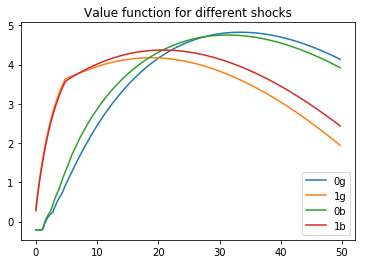

In [8]:
plt.plot(k,V0g[:,4], label='0g')
plt.plot(k,V1g[:,4], label='1g')
plt.plot(k,V0b[:,4], label='0b')
plt.plot(k,V1b[:,4], label='1b')
plt.title('Value function for different shocks')
plt.legend()

When solving the economy using aggreagate risk, we find that the policy functions have kinks and for the initial few periods the uneployed accumulate more assets than the employed. This is an unusual result. However, it depends significantly on the parameter values that we choose. And therefore, I am not sure about how to fix the problem with the policy functions. I have attached another policy function that I achieve using different parameter values. It is the file name with PS7_General Equilibrium (2). 

In [11]:
#Aggregation. We have 200 different social positions. 
assets=np.vstack((g0b,g1b,g0g,g1g))
A=sum(assets)/400
print('The aggregate (pc) assets are equal to '"{0:.2f}".format(A))


The aggregate (pc) assets are equal to 150.91


## Simulation for the Economy

In [88]:
#SIMULATION

np.random.seed( 10 )
random.seed(10)
#State space
k0=np.arange(0,5,0.2)
k1=np.arange(5.3,50,0.6)
k=np.concatenate((k0,k1))

#Simulate a history of aggregate and idiosyncratic shocks
zt=np.random.choice([0.95,1.05],size=1000,p=[0.5,0.5])
E=np.empty((500,1000))
for i in range(500):
    E[i,:]=np.random.choice([0,1],size=1000,p=[0.5,0.5])

#Initial level of assets for each individual. 
Assets=np.ones((500,1000)) 
Assets[:,0]=np.ones((500))*17.3
Kapital=np.empty((1000))
Kapital[0]=17.3
for t in range(1000):
    for i in range(500):
        a=int(np.where(np.isclose(k,Assets[i,t])==True)[0])
        j=np.argmin(abs(K - H(Kapital[t],zt[t])))
        if E[i,t]==0 and zt[t]==0:
            Assets[i,t+1]=g0b[a,j] 
        if E[i,t]==1 and zt[t]==0:
            Assets[i,t+1]=g1b[a,j]
        if E[i,t]==0 and zt[t]==1:
            Assets[i,t+1]=g0g[a,j] 
        if E[i,t]==1 and zt[t]==1:
            Assets[i,t+1]=g1g[a,j] 
            Kapital[t+1]=(np.sum(Assets[:,t+1]))/500

We tried working on the simulation. However, there is a problem with the code. Because it does not update the assets vector. And therefore, it does not update capital and I cannot retrieve prices. I am not sure if we are making a mistake with the code or if there is a conceptual error.